# KMeans算法
KMeans算法是最常用的一种聚类算法。KMeans算法名称中的K代表类别数量，Means代表每个类别内样本的均值，所以KMeans算法又称为K-均值算法。KMeans算法以距离作为样本间相似度的度量标准，将距离相近的样本分配至同一个类别。样本间距离的计算方式可以是**欧氏距离、曼哈顿距离、余弦相似度**等，KMeans算法通常采用欧氏距离来度量各样本间的距离。

KMeans算法的核心思想是对每个样本点计算到各个中心点的距离，并将该样本点分配给距离最近的中心点代表的类别，一次迭代完成后，根据聚类结果更新每个类别的中心点，然后重复之前操作再次迭代，直到前后两次分类结果没有差别。如下图所示的简单案例解释了KMeans算法的原理，该案例的目的是将8个样本点聚成3个类别（K＝3）
![KMeans算法原理](image/KMeans算法原理1.png)
![KMeans算法原理](image/KMeans算法原理2.png)

## KMeans算法的代码实现

In [9]:
import numpy as np
data = np.array([[3, 2], [4, 1], [3, 6], [4, 7], [3, 9], [6, 8], [6, 6], [7, 7]])
data

array([[3, 2],
       [4, 1],
       [3, 6],
       [4, 7],
       [3, 9],
       [6, 8],
       [6, 6],
       [7, 7]])

In [10]:
import pandas as pd
a = pd.DataFrame() 
a['x坐标'] = data[:, 0]
a['y坐标'] = data[:, 1]
a.head()

,x坐标,y坐标
0,3,2
1,4,1
2,3,6
3,4,7
4,3,9


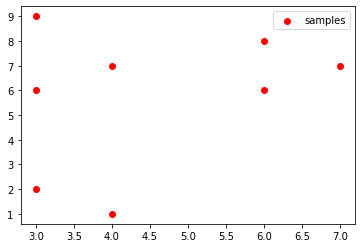

In [11]:
# 用Matplotlib库中的scatter()函数将数据以散点图的方式绘制出来
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:,1], c='red', marker='o', label='samples') 
# data[:,0]表示两列数的第1列数（第1个元素表示行，冒号表示所有行；第2个元素表示列，0表示第1列），即x坐标，同理，data[:,1]表示y坐标。所以data[:,0]表示两列数的第1列数（第1个元素表示行，冒号表示所有行；第2个元素表示列，0表示第1列），即x坐标，同理，data[:,1]表示y坐标。
# 此外，绘制散点图的scatter()函数中的参数c表示颜色，marker表示数据点的形状，label则表示数据标签。
plt.legend() # 设置图例
plt.show()

### 进行KMeans算法的聚类运算

In [12]:
from sklearn.cluster import KMeans # 引入Scikit-Learn库中的KMeans模型
kms = KMeans(n_clusters=2) # 设置KMeans模型的参数n_clusters，也就是前面提到的K值，这里设置为2，即将样本聚成2类，如果不设置则取默认值8
kms.fit(data) # 用fit()函数进行模型训练
label = kms.labels_ # 通过模型的labels_属性获取聚类结果，并赋给变量label
label # 打印输出变量label的结果如下。前2个数值为1，其他数值为0，代表原数据中前2个数据聚为一类，其他数据聚为另一类

array([1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

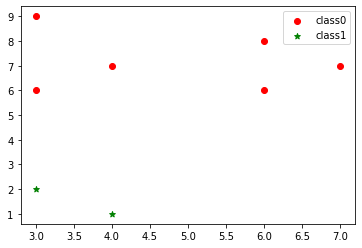

In [14]:
# 使用散点图展示KMeans算法的聚类结果
plt.scatter(data[label == 0][:, 0], data[label == 0][:, 1], c = "red", marker='o', label='class0') # 以红色圆圈样式绘制标签为0的散点图
plt.scatter(data[label == 1][:, 0], data[label == 1][:, 1], c = "green", marker='*', label='class1') # 以绿色星星样式绘制标签为1的散点图
plt.legend() # 设置图例
plt.show()

In [15]:
# 将K值设为3，即将原始数据聚成3类，与聚成2类的效果进行对比
kms_3 = KMeans(n_clusters=3)
kms_3.fit(data)
label_3 = kms_3.labels_
label_3

array([1, 1, 2, 2, 2, 0, 0, 0], dtype=int32)

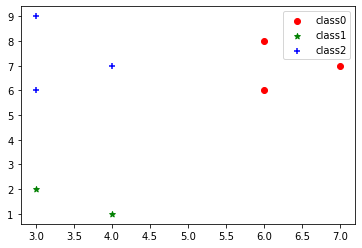

In [17]:
# 使用散点图展示KMeans算法的聚类结果
plt.scatter(data[label_3 == 0][:, 0], data[label_3 == 0][:, 1], c = "red", marker='o', label='class0') # 以红色圆圈样式绘制标签为0的散点图
plt.scatter(data[label_3 == 1][:, 0], data[label_3 == 1][:, 1], c = "green", marker='*', label='class1') # 以绿色星星样式绘制标签为1的散点图
plt.scatter(data[label_3 == 2][:, 0], data[label_3 == 2][:, 1], c = "blue", marker='+', label='class2') # 以蓝色加号样式绘制标签为2的散点图
plt.legend() # 设置图例
plt.show()

需要说明的是，因为KMeans算法的初始中心点是随机选取的，所以如果样本数据量较大，可能会导致每次运行代码得到的聚类结果略有不同。如果希望每次运行代码得到的聚类结果都是一样的，可以在模型中传入random_state参数，kms = KMeans(n_clusters=3, random_state=123)